In [173]:
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

# Obtener Datos

In [174]:
datos = yf.Ticker('^DJI')

In [175]:
Dow = datos.history(period='6mo')

In [176]:
Dow.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-15,34924.808594,34990.410156,34762.871094,34987.019531,320450000,0,0
2021-07-16,35007.941406,35090.011719,34647.820312,34687.851562,322980000,0,0
2021-07-19,34528.480469,34528.480469,33741.761719,33962.039062,440440000,0,0
2021-07-20,33981.789062,34621.789062,33981.789062,34511.988281,387020000,0,0
2021-07-21,34556.960938,34820.238281,34556.960938,34798.000000,317090000,0,0


In [177]:
Dow['MA_20'] = Dow.Close.rolling(20).mean()

In [178]:
Dow['MA_50'] = Dow.Close.rolling(50).mean()

In [179]:
Dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2021-07-15 to 2022-01-14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          129 non-null    float64
 1   High          129 non-null    float64
 2   Low           129 non-null    float64
 3   Close         129 non-null    float64
 4   Volume        129 non-null    int64  
 5   Dividends     129 non-null    int64  
 6   Stock Splits  129 non-null    int64  
 7   MA_20         110 non-null    float64
 8   MA_50         80 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 10.1 KB


In [206]:
Dow['Fecha'] = Dow.index

In [208]:
Dow.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,Fecha
Date,,,,,,,,,,
2021-07-15,34924.808594,34990.410156,34762.871094,34987.019531,320450000,0,0,NaN,NaN,2021-07-15
2021-07-16,35007.941406,35090.011719,34647.820312,34687.851562,322980000,0,0,NaN,NaN,2021-07-16
2021-07-19,34528.480469,34528.480469,33741.761719,33962.039062,440440000,0,0,NaN,NaN,2021-07-19
2021-07-20,33981.789062,34621.789062,33981.789062,34511.988281,387020000,0,0,NaN,NaN,2021-07-20
2021-07-21,34556.960938,34820.238281,34556.960938,34798.000000,317090000,0,0,NaN,NaN,2021-07-21


# Mostrar precios de cierre

Text(0, 0.5, 'Close Price')

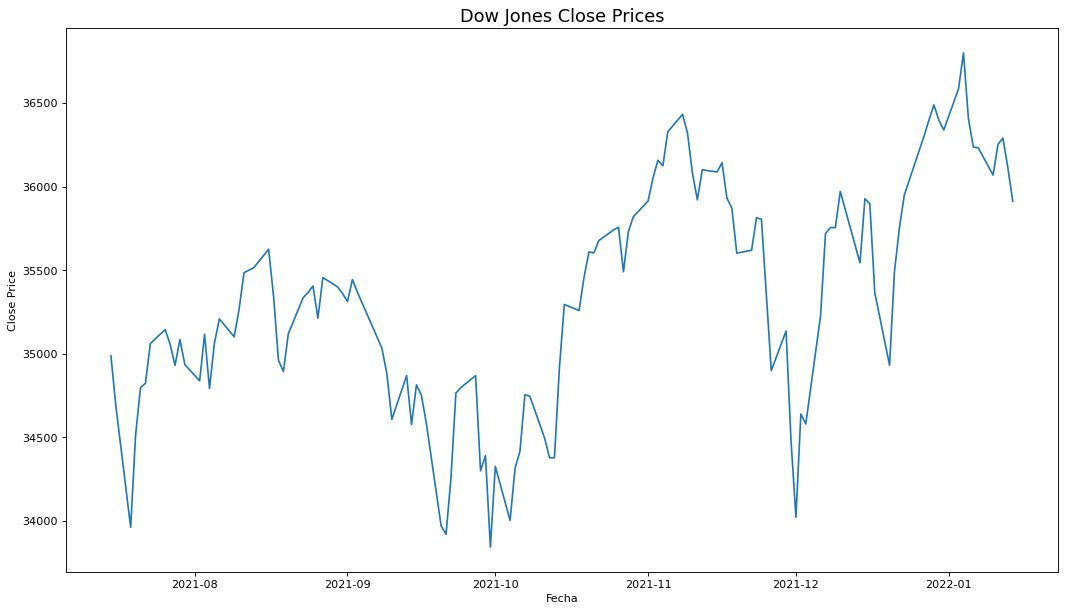

In [212]:
plt.figure(figsize=(16,9),dpi=80)
plt.plot(Dow.Close)
plt.title('Dow Jones Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')

# Graficar Medias Moviles

Text(0, 0.5, 'Close Price')

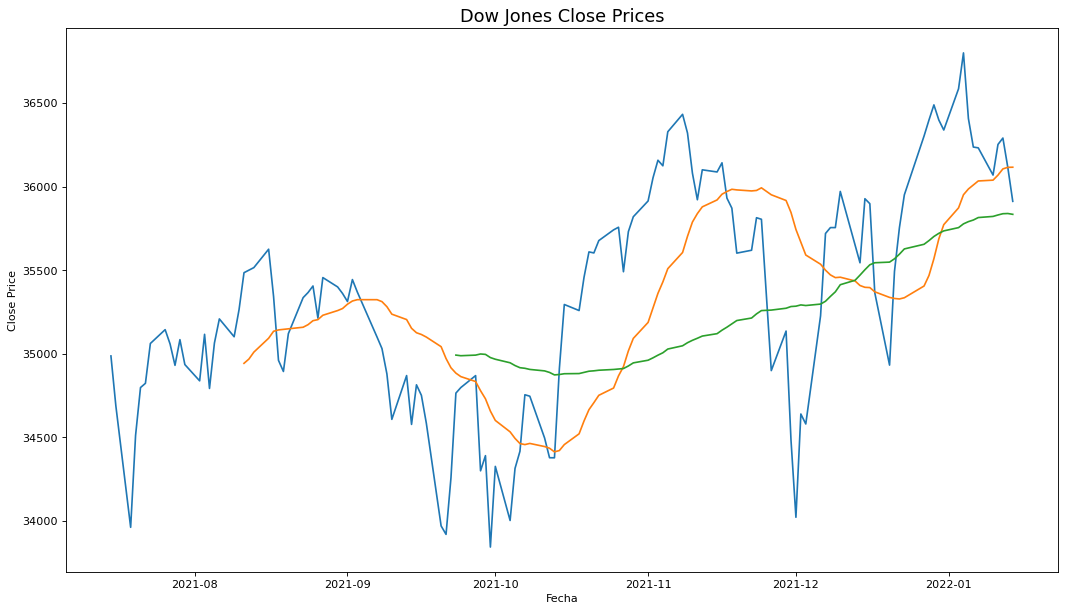

In [214]:
plt.figure(figsize=(16,9),dpi=80)
plt.plot(Dow.Close)
plt.plot(Dow.MA_20)
plt.plot(Dow.MA_50)
plt.title('Dow Jones Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')

In [184]:
Mercados = ['^DJI','^IXIC','^GSPC']
data_mercados = yf.download(Mercados, period='6mo')

[*********************100%***********************]  3 of 3 completed


In [185]:
data_mercados.columns

MultiIndex([('Adj Close',  '^DJI'),
            ('Adj Close', '^GSPC'),
            ('Adj Close', '^IXIC'),
            (    'Close',  '^DJI'),
            (    'Close', '^GSPC'),
            (    'Close', '^IXIC'),
            (     'High',  '^DJI'),
            (     'High', '^GSPC'),
            (     'High', '^IXIC'),
            (      'Low',  '^DJI'),
            (      'Low', '^GSPC'),
            (      'Low', '^IXIC'),
            (     'Open',  '^DJI'),
            (     'Open', '^GSPC'),
            (     'Open', '^IXIC'),
            (   'Volume',  '^DJI'),
            (   'Volume', '^GSPC'),
            (   'Volume', '^IXIC')],
           )

# Variables de medias moviles

In [186]:
data_mercados['MA_20_DJ'] = data_mercados.Close['^DJI'].rolling(20).mean()
data_mercados['MA_20_S&P'] = data_mercados.Close['^GSPC'].rolling(20).mean()
data_mercados['MA_20_NASDAQ'] = data_mercados.Close['^IXIC'].rolling(20).mean()
data_mercados['MA_50_DJ'] = data_mercados.Close['^DJI'].rolling(50).mean()
data_mercados['MA_50_S&P'] = data_mercados.Close['^GSPC'].rolling(50).mean()
data_mercados['MA_50_NASDAQ'] = data_mercados.Close['^IXIC'].rolling(50).mean()

In [187]:
data_mercados.head()

Adj Close                                    Close  \
                    ^DJI        ^GSPC         ^IXIC          ^DJI   
Date                                                                
2021-07-15  34987.019531  4360.029785  14543.129883  34987.019531   
2021-07-16  34687.851562  4327.160156  14427.240234  34687.851562   
2021-07-19  33962.039062  4258.490234  14274.980469  33962.039062   
2021-07-20  34511.988281  4323.060059  14498.879883  34511.988281   
2021-07-21  34798.000000  4358.689941  14631.950195  34798.000000   

                                               High               \
                  ^GSPC         ^IXIC          ^DJI        ^GSPC   
Date                                                               
2021-07-15  4360.029785  14543.129883  34990.410156  4369.020020   
2021-07-16  4327.160156  14427.240234  35090.011719  4375.089844   
2021-07-19  4258.490234  14274.980469  34528.480469  4296.399902   
2021-07-20  4323.060059  14498.879883  34621.789062  4336.839844   
2021-07-21  4358.689941  14631.950195  34820.238281  4359.700195   

                                   Low  ...          Open     Volume  \
                   ^IXIC          ^DJI  ...         ^IXIC       ^DJI   
Date                                    ...                            
2021-07-15  14650.370117  34762.871094  ...  14635.780273  320450000   
2021-07-16  14623.019531  34647.820312  ...  14597.509766  322980000   
2021-07-19  14313.599609  33741.761719  ...  14235.980469  440440000   
2021-07-20  14555.750000  33981.789062  ...  14330.459961  387020000   
2021-07-21  14633.139648  34556.960938  ...  14508.750000  317090000   

                                   MA_20_DJ MA_20_S&P MA_20_NASDAQ MA_50_DJ  \
                 ^GSPC       ^IXIC                                            
Date                                                                          
2021-07-15  3226930000  4493540000      NaN       NaN          NaN      NaN   
2021-07-16  3165160000  4048940000      NaN       NaN          NaN      NaN   
2021-07-19  4155790000  4507040000      NaN       NaN          NaN      NaN   
2021-07-20  3634190000  4618980000      NaN       NaN          NaN      NaN   
2021-07-21  3078550000  4075150000      NaN       NaN          NaN      NaN   

           MA_50_S&P MA_50_NASDAQ  
                                   
Date                               
2021-07-15       NaN          NaN  
2021-07-16       NaN          NaN  
2021-07-19       NaN          NaN  
2021-07-20       NaN          NaN  
2021-07-21       NaN          NaN  

[5 rows x 24 columns]

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

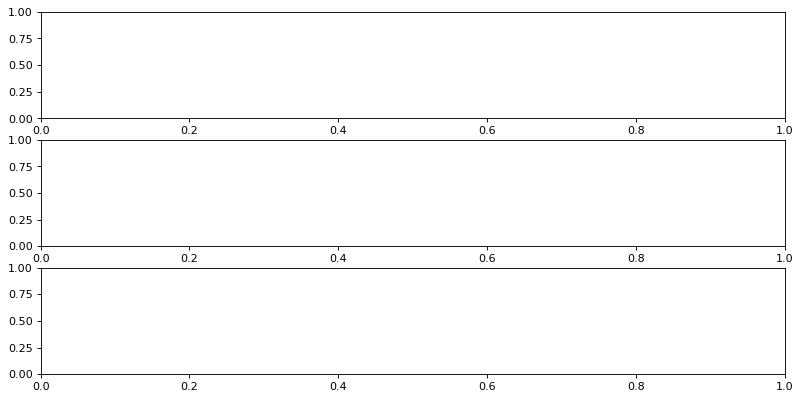

In [236]:
fig, ax = plt.subplots(3,1, figsize=(12,6), sharey=True, dpi=80)


ax[0].plot(data_mercados.Close['^DJI'])
ax[1].plot(data_mercados.Close['^GSPC'])
ax[2].plot(data_mercados.Close['^IXIC'])


# Graficos en PLOTLY

In [237]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Dow.index, y=Dow['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=Dow.index, y=Dow['MA_20'], name='MA 20'))
fig.add_trace(go.Scatter(x=Dow.index, y=Dow['MA_50'], name='MA 50'))
fig.update_layout(title='Last 6 months - Dow Jones Industrial Average (^DJI)')
fig.update_layout(xaxis_title='Last 6 months')
fig.update_layout(yaxis_title='Close price')

fig.show()

In [188]:
from plotly.subplots import make_subplots

In [238]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^DJI'], name='Close Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_DJ'], name='MA 20 DJI'),row=1, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_DJ'], name='MA 50 DJI'),row=1, col=1)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^GSPC'], name='Close Price'), row=1, col=2)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_S&P'], name='MA 20 S&P'),row=1, col=2)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_S&P'], name='MA 50 S&P'), row=1, col=2)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^IXIC'], name='Close Price'), row=2, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_NASDAQ'], name='MA 20 NASDAQ'),row=2, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_NASDAQ'], name='MA 50 NASDAQ'), row=2, col=1)

fig.update_layout(title='Last 6 months - Markets USA')
fig.update_layout(xaxis_title='Last 6 months')
fig.update_layout(yaxis_title='Close price')

fig.show()